# Classification using Decision Tree

In [2]:
import pandas as pd
import numpy as np

PlayTennis = pd.read_csv("PlayTennis.csv")
PlayTennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['outlook'] = Le.fit_transform(PlayTennis['play'])

PlayTennis


,outlook,temp,humidity,windy,play
0,0,1,0,0,no
1,0,1,0,1,no
2,1,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,0,0,1,1,no
6,1,0,1,1,yes
7,0,2,0,0,no
8,1,0,1,0,yes
9,1,2,1,0,yes


In [4]:
from sklearn.model_selection import train_test_split
y = PlayTennis['play']
X = PlayTennis.drop(['play'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state =101)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

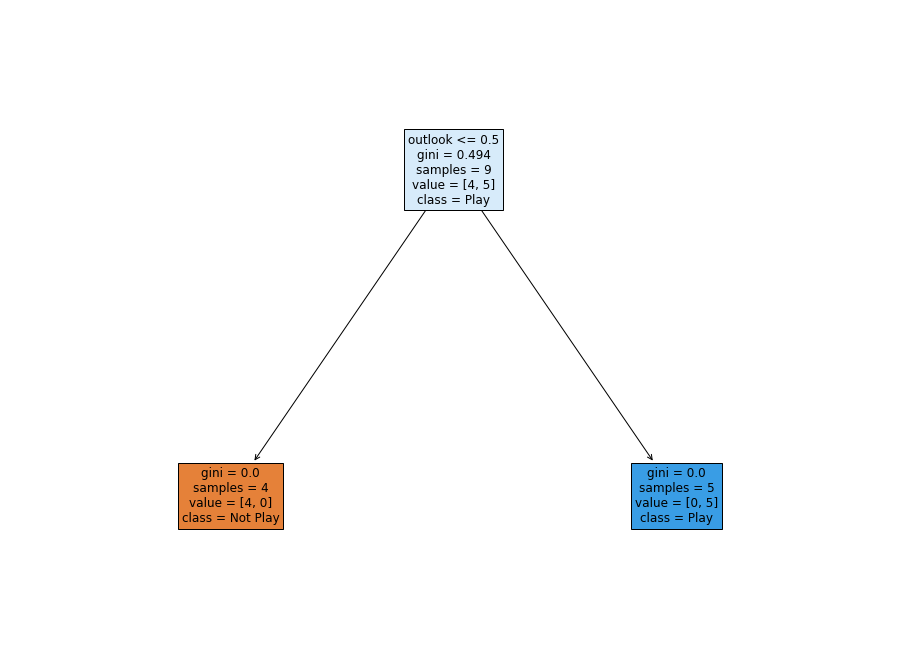

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(16,12))
a = plot_tree(dtree, feature_names=PlayTennis.columns, fontsize=12, filled=True, class_names=['Not Play','Play'])

In [7]:
print(X_test)

    outlook  temp  humidity  windy
12        1     1         1      0
2         1     1         0      0
3         1     2         0      0
13        0     2         0      1
10        1     2         1      1


In [8]:
predictions = dtree.predict(X_test)
data_p = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
data_p

,Actual,Predicted
12,yes,yes
2,yes,yes
3,yes,yes
13,no,no
10,yes,yes
